In [3]:
!pip install selectivesearch
!pip install torch_snippets
from torch_snippets import *
import selectivesearch
from skimage.segmentation import felzenszwalb

  Preparing metadata (setup.py) ... done
  Created wheel for selectivesearch: filename=selectivesearch-0.4-py3-none-any.whl size=4335 sha256=7b9e1bf1f0ec8b72cc16baa27e6bc86622abeaf684faf4b3244b4c5c870b4bb0
  Stored in directory: /root/.cache/pip/wheels/0e/49/95/01447a4e0f48a135ac91fbdb1dd2a1c0523e40e29957b383a3
Successfully built selectivesearch


In [4]:
img = read('/content/dr-strange.jpg', 1)
segments_fz = felzenszwalb(img, scale=200)

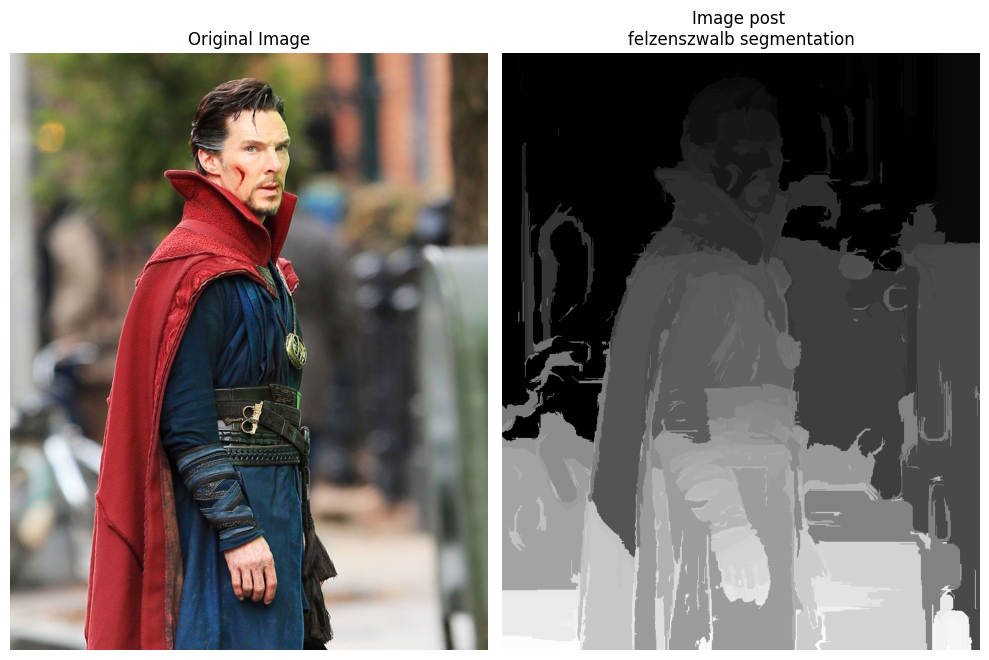

In [5]:
subplots([img, segments_fz],
         titles=['Original Image', "Image post \nfelzenszwalb segmentation"],
         sz=10,
         nc=2)

In [7]:
def extract_candidates(img):
  img_lbl, regions = selectivesearch.selective_search(img, scale=200, min_size=100)
  """Calculate the image area and initialize a list (candidates) that we will
     use to store the candidates that pass a defined threshold:"""
  img_area = np.prod(img.shape[:2])
  candidates = []
  """Fetch only those candidates (regions) that are over 5% of the total
     image area and less than or equal to 100% of the image area and return
     them:"""
  for r in regions:
    if r['rect'] in candidates:
      continue
    if r['size'] < (0.05 * img_area):
      continue
    if r['size'] > (1 * img_area):
      continue
    x, y, w, h = r['rect']
    candidates.append(list(r['rect']))
    return candidates

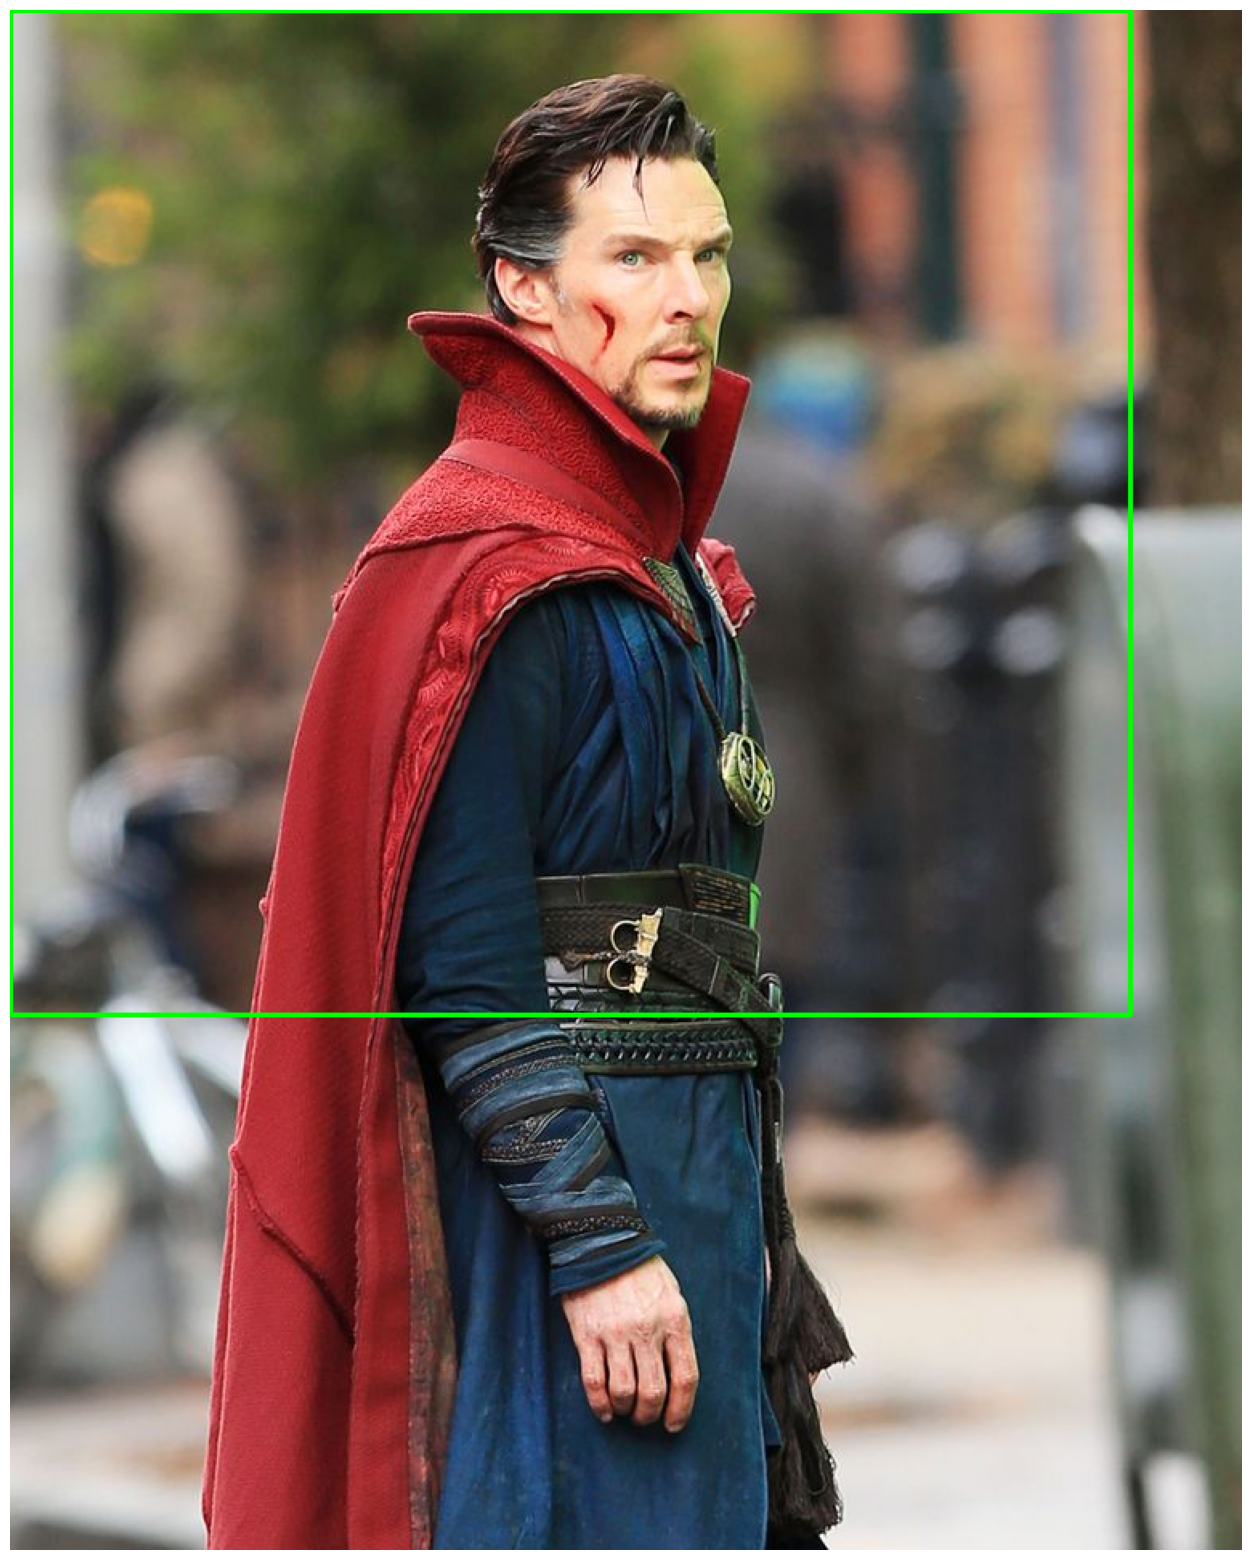

In [8]:
candidates = extract_candidates(img)
show(img, bbs=candidates)